In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as  np

In [2]:
# Use latex style requires installing some packeges
# apt install texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super texlive-science
plt.style.use('./article.mplstyle')

## Metric Placement Experiment

In [3]:
def get_data(folder, labels):
    data = {label: {
            "energy": [],
            "energy_std": [],
            "time": [],
            "time_std": [],
            "exp_time": []
        } for label in labels
    }
    with open(f"{folder}/exp_relocate_metrics.csv") as file:
        reader = csv.reader(file, delimiter=",")
        next(reader)
        for row in reader:
            data[row[5]]["energy"].append(float(row[0]))
            data[row[5]]["energy_std"].append(float(row[1]))
            data[row[5]]["time"].append(float(row[2]))
            data[row[5]]["time_std"].append(float(row[3]))
            data[row[5]]["exp_time"].append(float(row[4]))

    with open(f"{folder}/exp_relocate_exp_events.csv") as file:
        reader = csv.reader(file, delimiter=",")
        for row in reader:
            if row[0] == "search":
                search_time = float(row[1])
    return data, search_time

In [4]:
labels = ["local", "relocate"]

placement = {
    "local": "local (g15)",
    "relocate": "relocate (xps)"
}

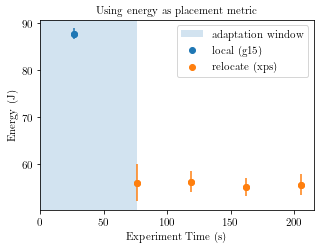

In [5]:
folder = "experiments/metric_placement/relocate_energy"
data, search_time = get_data(folder, labels)
for label, points in data.items():
    plt.scatter(points["exp_time"], points["energy"], label = placement[label])
    plt.errorbar(points["exp_time"], points["energy"], fmt="o", yerr=points["energy_std"])
    
plt.axvspan(0, search_time, alpha=0.2, label="adaptation window")
plt.xlabel("Experiment Time (s)")
plt.ylabel("Energy (J)")
plt.legend()
plt.xlim(0)
plt.title("Using energy as placement metric")
plt.savefig('metric_energy.pdf')  


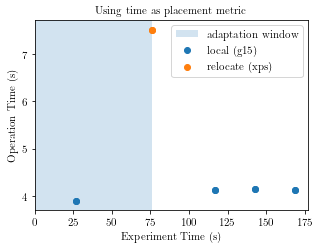

In [6]:
folder = "experiments/metric_placement/relocate_time"
data, search_time = get_data(folder, labels)
for label, points in data.items():
    plt.scatter(points["exp_time"], points["time"], label = placement[label])
    plt.errorbar(points["exp_time"], points["time"], fmt="o", yerr=points["time_std"])
    
plt.axvspan(0, search_time, alpha=0.2, label="adaptation window")
plt.xlabel("Experiment Time (s)")
plt.ylabel("Operation Time (s)")
plt.legend()
plt.xlim(0)
plt.title("Using time as placement metric")
plt.savefig('metric_time.pdf') 